# Exploring Hacker News Posts

## Introduction 
Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") receive votes and comments, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of the Hacker News listings can get hundreds of thousands of visitors as a result.

The original dataset can be found [here](https://www.kaggle.com/datasets/hacker-news/hacker-news-posts), but for this analysis, the data has been reduced from almost 300,000 rows to approximately 20,000 rows by removing all submissions that did not receive any comments and then randomly sampling from the remaining submissions.

## Data Description
Below are descriptions of the columns:
* id: the unique identifier from Hacker News for the post
* title: the title of the post
* url: the URL that the posts links to, if the post has a URL
* num_points: the number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
* num_comments: the number of comments on the post
* author: the username of the person who submitted the post
* created_at: the date and time of the post's submission

Here are the first few rows of the dataset:
|id|title|url|num_points|num_comments|author|created_at|
|--|-----|---|----------|------------|------|----------|
|12224879|Interactive Dynamic Video|http://www.interactivedynamicvideo.com/|386|52|ne0phyte|8/4/2016 11:52|
|10975351|How to Use Open Source and Shut the F*ck Up at the Same Time|http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/|39|10|josep2|1/26/2016 19:30|
11964716|Florida DJs May Face Felony for April Fools' Water Joke|http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/|2|1|vezycash|6/23/2016 22:20|
11919867|Technology ventures: From Idea to Enterprise|https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429|3|1|hswarna|6/17/2016 0:01|
10301696|Note by Note: The Making of Steinway L1037 (2007)|http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0	|8|2|walterbell|9/30/2015 4:12|



We are specifically interested in posts with titles that begin with either **Ask HN** or **Show HN.** Users submit Ask HN posts to ask the Hacker News community a specific question. Below are a few examples:
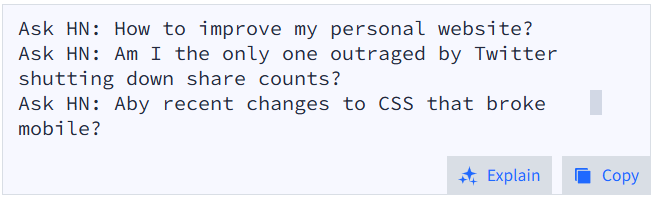

Likewise, users submit Show HN posts to show the Hacker News community a project, product, or just something interesting. Below are a few examples:
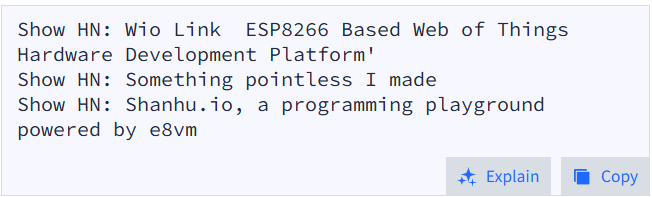

We will compare these two types of posts to determine the following:

* Do *Ask posts* or *Show posts* receive more comments on average?
* Do posts created at a certain time receive more comments on average?

In [1]:
#import the necessary library to read the file to list of lists
import csv

with open('hacker_news.csv') as file: #using with to open the file to ensure the file is closed after the with block
    read_file = csv.reader(file)
    hn = list(read_file)
    
# print the first 5 rows to see the result
print(hn[:5])

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']]


In [2]:
# remove the first row as it contains the column names and not real data
headers = hn[0]

#remove the header row from the dataset
hn = hn[1:]

#print to show the dataset is updated
print(headers)
print(hn[:5])

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
[['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01'], ['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12']]


Now that we have removed the headers from hn, we're ready to filter our data. Since we're only concerned with post titles beginning with **Ask HN** or **Show HN**, we'll create new lists of lists containing just the data for those titles.

To find the posts that begin with either **Ask HN** or **Show HN**, we'll use the string method `startswith`. We will also be using `lower` method to ensure capitalisation will not impact our sorting. 

In [3]:
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1].lower() #making sure case does not make a difference in identifying the posts
    if title.startswith('ask hn'):
        ask_posts.append(row)
    elif title.startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)

# Check the number of posts in ask_posts, show_posts, and other_posts
print(f"Number of posts beginning in 'Ask HN': {len(ask_posts)}")
print(f"Number of posts beginning in 'Show HN': {len(show_posts)}")
print(f"Number of any other posts': {len(other_posts)}")

Number of posts beginning in 'Ask HN': 1744
Number of posts beginning in 'Show HN': 1162
Number of any other posts': 17194


Next, let's determine if ask posts or show posts receive more comments on average.

In [4]:
# Find the total number of comments in ask posts and its average
total_ask_comments = 0
for post in ask_posts:
    total_ask_comments += int(post[4])
    
#Compute the average number of comments on ask posts
avg_ask_comments = total_ask_comments / len(ask_posts)
print(f'Comments received for Ask posts on average: {avg_ask_comments}')

Comments received for Ask posts on average: 14.038417431192661


In [5]:
# Find the total number of comments in show posts and its average

total_show_comments = 0
for post in show_posts:
    total_show_comments += int(post[4])

#Compute the average number of comments on show posts
avg_show_comments = total_show_comments / len(show_posts)
print(f'Comments received for Show posts on average: {avg_show_comments}')

Comments received for Show posts on average: 10.31669535283993


The result showed that **on average, *Ask posts* received more comments than *Show posts* about by 4.** Since ask posts are more likely to receive comments, we will focus our remaining analysis just on these posts.

We will now determine if *ask posts* created *at a certain time* are more likely to attract comments. We will use the following steps to perform this analysis:

1. Calculate the number of *ask posts* created in each hour of the day, along with the number of comments received.
2. Calculate the average number of comments *ask posts* receive by hour created.

We will work on the first step — calculating the number of ask posts and comments by hour created. We will use the `datetime` module to work with the data in the `created_at` column.

We will use the `datetime.strptime()` constructor to parse dates stored as strings and return `datetime` objects:

In [6]:
import datetime as dt

#result_list should be a list of lists with the first element being the date the posts created
#whilst the second element is the number of comments received 

result_list = []
for post in ask_posts:
    result_list.append([post[6],int(post[4])]) #post[6] is posts created at time whereas post[4] is numnber of comments received
    
counts_by_hour = {} # to contain the number of ask posts created during each hour of the day.
comments_by_hour = {} # to contain the corresponding number of comments ask posts created at each hour received.

for row in result_list:
    hour = row[0] # to extract the hour 
    hour_dt = dt.datetime.strptime(hour, '%m/%d/%Y %H:%M')
    hour_final = dt.datetime.strftime(hour_dt, '%H') # Use the datetime.strftime() method to select just the hour from the datetime object.
    if hour_final not in counts_by_hour:
        counts_by_hour[hour_final] = 1
        comments_by_hour[hour_final] = row[1]
    else:
        counts_by_hour[hour_final] += 1
        comments_by_hour[hour_final] += row[1]

We have now created two dictionaries:

* `counts_by_hour`: contains the number of *ask posts* created during each hour of the day.
* `comments_by_hour`: contains the corresponding number of comments *ask posts* created at each hour received.

Next, we will use these two dictionaries to calculate the average number of comments for *ask posts* created during each hour of the day.

In [7]:
avg_by_hour = []

for result in comments_by_hour:
    avg_by_hour.append([result, comments_by_hour[result] / counts_by_hour[result]]) # counts_by_hour can be used here still because it's a global variable

print('Average number of comments for posts created during each hour:')
print(avg_by_hour)

Average number of comments for posts created during each hour:
[['09', 5.5777777777777775], ['13', 14.741176470588234], ['10', 13.440677966101696], ['14', 13.233644859813085], ['16', 16.796296296296298], ['23', 7.985294117647059], ['12', 9.41095890410959], ['17', 11.46], ['15', 38.5948275862069], ['21', 16.009174311926607], ['20', 21.525], ['02', 23.810344827586206], ['18', 13.20183486238532], ['03', 7.796296296296297], ['05', 10.08695652173913], ['19', 10.8], ['01', 11.383333333333333], ['22', 6.746478873239437], ['08', 10.25], ['04', 7.170212765957447], ['00', 8.127272727272727], ['06', 9.022727272727273], ['07', 7.852941176470588], ['11', 11.051724137931034]]


The result in this format makes it difficult to identify the hours with the highest values. We will finish by sorting this list of lists and printing the **five highest values** in a format that is easier to read.

In [8]:
swap_avg_by_hour = []

for row in avg_by_hour:
    swap_avg_by_hour.append([row[1],row[0]])

sorted_swap = sorted(swap_avg_by_hour, reverse=True) # Since the first column of this list is the average number of comments, sorting the list will sort by the average number of comments which is what we want

print(f'Top 5 Hours for Ask Posts Comments: {sorted_swap[:5]}')

for row in sorted_swap[:5]:
    hour_dt = dt.datetime.strptime(row[1], '%H')
    row[1] = dt.datetime.strftime(hour_dt, '%H:%M')
    print(f'{row[1]}: {row[0]:.2f} average comments per post') # use {:.2f} to indicate only two decimal places.

Top 5 Hours for Ask Posts Comments: [[38.5948275862069, '15'], [23.810344827586206, '02'], [21.525, '20'], [16.796296296296298, '16'], [16.009174311926607, '21']]
15:00: 38.59 average comments per post
02:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post
21:00: 16.01 average comments per post


We can see from our result that **3pm Eastern Time in the US** (which is equivalent to 8 PM BST (British Summer Time) or 7 PM GMT (Greenwich Mean Time) appeared to have the highest chance of receiving most comments. As a result, if the goal is to attract the most comments, users should try to make **Ask posts at the equivalent time of 3pm Eastern Time in the US of theirs.** 